<h3 align="center">Problem Statement</h3>

**For a given “Logistic Data.csv” dataset, determine the classification model** 

**a)	Using logistic regression algorithm**  


**b)	Using KNN algorithm**  

**c)	Compare (a) and (b) and state which gives better performance in terms of metric parameters such as accuracy score, precision score and recall score.**

# Part A: Data Preprocessing

# Step 1: Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**numpy: linear algebra (vectos and matrices)  
matplotlib: data visualization (graphs and charts)  
pandas: open source data for analysis and manipulation tool**

# Step 2: import data set

In [2]:
dataset=pd.read_csv('Logistic Data.csv')

In [3]:
dataset


,Age,Salary,Purchased Plot
0,22,22990,0
1,38,24200,0
2,29,52030,0
3,30,68970,0
4,22,91960,0
...,...,...,...
395,49,49610,1
396,54,27830,1
397,53,24200,1
398,39,39930,0


# Step 3: To create Feature Matrix(X) and Dependent variable vector(Y)

In [4]:
# [row_start : row_end , column_start : column_end]
# leave blank if you want all values
X=dataset.iloc[:,:-1].values#all rows, all except last column
Y=dataset.iloc[:,-1].values#all rows, only last column
#only -1 since we don't need a number of columns, only 1 column is req

In [5]:
X

array([[    22,  22990],
       [    38,  24200],
       [    29,  52030],
       [    30,  68970],
       [    22,  91960],
       [    30,  70180],
       [    30, 101640],
       [    35, 181500],
       [    28,  39930],
       [    38,  78650],
       [    29,  96800],
       [    29,  62920],
       [    23, 104060],
       [    35,  21780],
       [    21,  99220],
       [    32,  96800],
       [    50,  30250],
       [    48,  31460],
       [    49,  33880],
       [    51,  35090],
       [    48,  26620],
       [    50,  59290],
       [    51,  49610],
       [    48,  26620],
       [    49,  27830],
       [    50,  24200],
       [    52,  33880],
       [    50,  36300],
       [    32,  52030],
       [    34,  21780],
       [    34,  89540],
       [    30, 165770],
       [    24,  19360],
       [    31,  53240],
       [    30, 108900],
       [    38,  32670],
       [    36,  33880],
       [    33,  59290],
       [    29,  87120],
       [    30,  37510],


In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# Step 4: Replacing Missing Data

**To fill in gaps in the data, we use the SimpleImputer class from the impute module of the sci-kit learn library. We make an object (here, imputer) and then use the fit function to find mean of the columns and transform function to replace the missing data with the mean value.**

In [7]:
from sklearn.impute import SimpleImputer
#    library  module        class

In [8]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#imputer is an object of class SimpleImputer
imputer.fit(X[:,:])
#avg of column 1 and 2
X[:,:]=imputer.transform(X[:,:])
#putting the avg values to the table

In [9]:
X

array([[    22,  22990],
       [    38,  24200],
       [    29,  52030],
       [    30,  68970],
       [    22,  91960],
       [    30,  70180],
       [    30, 101640],
       [    35, 181500],
       [    28,  39930],
       [    38,  78650],
       [    29,  96800],
       [    29,  62920],
       [    23, 104060],
       [    35,  21780],
       [    21,  99220],
       [    32,  96800],
       [    50,  30250],
       [    48,  31460],
       [    49,  33880],
       [    51,  35090],
       [    48,  26620],
       [    50,  59290],
       [    51,  49610],
       [    48,  26620],
       [    49,  27830],
       [    50,  24200],
       [    52,  33880],
       [    50,  36300],
       [    32,  52030],
       [    34,  21780],
       [    34,  89540],
       [    30, 165770],
       [    24,  19360],
       [    31,  53240],
       [    30, 108900],
       [    38,  32670],
       [    36,  33880],
       [    33,  59290],
       [    29,  87120],
       [    30,  37510],


# Step 5: Encode (Categorical Data):
# not required

# Step 6: Splitting of data set into training data set and testing data set


In [10]:
from sklearn.model_selection import train_test_split
#    library    module                 function 
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=1)
# splits data set into train and test data in an 80:20 ratio

In [11]:
Xtrain

array([[    32,  33880],
       [    48,  26620],
       [    49, 141570],
       [    35,  21780],
       [    25,  98010],
       [    28, 105270],
       [    51,  39930],
       [    38,  70180],
       [    50,  27830],
       [    29,  38720],
       [    35, 163350],
       [    63,  41140],
       [    55,  25410],
       [    41,  66550],
       [    28, 108900],
       [    61,  45980],
       [    52, 106480],
       [    40,  94380],
       [    38,  93170],
       [    37,  52030],
       [    23,  59290],
       [    49, 106480],
       [    34,  41140],
       [    50,  36300],
       [    38,  60500],
       [    42, 116160],
       [    36, 136730],
       [    52, 104060],
       [    48,  95590],
       [    47,  47190],
       [    44,  71390],
       [    45,  64130],
       [    38,  88330],
       [    44,  87120],
       [    30, 116160],
       [    33, 140360],
       [    44,  62920],
       [    44,  62920],
       [    23,  99220],
       [    49,  49610],


In [12]:
Xtest

array([[    39,  39930],
       [    42,  73810],
       [    39, 142780],
       [    42, 147620],
       [    29, 142780],
       [    41,  78650],
       [    23,  43560],
       [    52, 107690],
       [    34,  21780],
       [    51, 170610],
       [    37,  87120],
       [    42,  88330],
       [    38,  87120],
       [    51, 158510],
       [    56,  99220],
       [    59, 160930],
       [    63, 100430],
       [    30,  70180],
       [    31, 105270],
       [    63, 123420],
       [    43,  90750],
       [    53, 106480],
       [    47, 168190],
       [    50,  52030],
       [    48,  31460],
       [    29,  18150],
       [    61,  56870],
       [    52,  89540],
       [    56,  41140],
       [    55, 137940],
       [    42,  50820],
       [    22,  91960],
       [    21, 104060],
       [    60,  89540],
       [    30, 101640],
       [    33,  96800],
       [    25,  21780],
       [    35, 104060],
       [    53,  24200],
       [    22,  30250],


In [13]:
Ytest

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

# Step 7: Feature Scaling: 
### not required in regression(any kind)
### (may or may not use, but let's use it this once)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.fit_transform(Xtest)

In [15]:
Xtrain

array([[-0.80330081, -1.19121795],
       [ 0.75697997, -1.36859801],
       [ 0.85449752,  1.43991958],
       [-0.51074816, -1.48685138],
       [-1.48592365,  0.37563923],
       [-1.19337101,  0.55301929],
       [ 1.04953262, -1.04340124],
       [-0.21819552, -0.30431766],
       [ 0.95201507, -1.33903467],
       [-1.09585346, -1.07296458],
       [-0.51074816,  1.97205975],
       [ 2.21974321, -1.0138379 ],
       [ 1.43960282, -1.39816136],
       [ 0.07435713, -0.39300769],
       [-1.19337101,  0.64170932],
       [ 2.02470811, -0.89558452],
       [ 1.14705017,  0.58258263],
       [-0.02316042,  0.2869492 ],
       [-0.21819552,  0.25738586],
       [-0.31571307, -0.74776781],
       [-1.68095875, -0.57038775],
       [ 0.85449752,  0.58258263],
       [-0.60826571, -1.0138379 ],
       [ 0.95201507, -1.13209127],
       [-0.21819552, -0.54082441],
       [ 0.17187468,  0.81908937],
       [-0.41323061,  1.32166621],
       [ 1.14705017,  0.52345594],
       [ 0.75697997,

# Part B: Build a Model

<h3 align="center">LOGISTIC REGRESSION ALGORITHM</h3>

# Step 1: Training the linear model

In [16]:
from sklearn.linear_model import LogisticRegression
LoR=LogisticRegression(random_state=0)
LoR.fit(Xtrain,Ytrain)

LogisticRegression(random_state=0)

# Step 2: Testing the Classification model

In [17]:
Yest_LoR=LoR.predict(Xtest)

In [18]:
# Concatenated side by side for our convenience to see the difference.
print(np.concatenate((Yest_LoR.reshape(len(Yest_LoR),1),Ytest.reshape(len(Ytest),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


<h3 align="center">K NEAREST NEIGHBOR ALGORITHM</h3>

# Step 1: Training the linear model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KC=KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)
KC.fit(Xtrain,Ytrain)

KNeighborsClassifier()

# Step 2: Testing the Classification model

In [20]:
Yest_KNN=KC.predict(Xtest)

In [21]:
# Concatenated side by side for our convenience to see the difference.
print(np.concatenate((Yest_KNN.reshape(len(Yest_KNN),1),Ytest.reshape(len(Ytest),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


# Part C: Performances Metric

# Confusion Matrix
### Used to evaluate the performance of a classification model. 

**The fundamental of a confusion matrix is the number of correct and incorrect predictions which are summed up classwise.**  
**It is always a square matrix since it calculates number of correct predictions and number of misfires for each class (here, 2 classes 0 and 1).**

### Accuracy:
**Accuracy is defined as the ratio of correctly predicted examples by the total examples.**  
### Precision:
**Also called Positive predictive value.  
The ratio of correct positive predictions to the total predicted positives.**  
### Recall:
**Also called Sensitivity, Probability of Detection, True Positive Rate  
The ratio of correct positive predictions to the total positives examples.**


<h3 align="center">LOGISTIC REGRESSION ALGORITHM</h3>

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm_LoR=confusion_matrix(Ytest,Yest_LoR)
print(cm_LoR)
print(accuracy_score(Ytest,Yest_LoR))
print(precision_score(Ytest,Yest_LoR))
print(recall_score(Ytest,Yest_LoR))

[[43  5]
 [10 22]]
0.8125
0.8148148148148148
0.6875


<h3 align="center">K NEAREST NEIGHBOR ALGORITHM</h3>

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm_KNN=confusion_matrix(Ytest,Yest_KNN)
print(cm_KNN)
print(accuracy_score(Ytest,Yest_KNN))
print(precision_score(Ytest,Yest_KNN))
print(recall_score(Ytest,Yest_KNN))

[[40  8]
 [ 6 26]]
0.825
0.7647058823529411
0.8125


# plot error vs k values, then select k value where error is minimised

In [24]:
error_rate=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(Xtrain,Ytrain)
    Ypred_i=KC.predict(Xtest)
    error_rate.append(np.mean(Ypred_i!=Ytest))

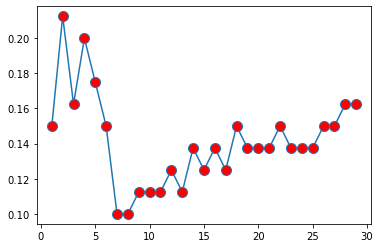

In [25]:
plt.plot(range(1,30),error_rate,marker='o',markerfacecolor='red',markersize=10)

**If we plot a graph for number of neighbors(k) against their error rates, in a range of 1 to 30 neighbors, we find that error is minimum for k values 7 and 8. Hence, we will build the model again using 7 neighbors for minimum error.**

In [26]:
KC=KNeighborsClassifier(n_neighbors=7, weights='uniform', p=2)
KC.fit(Xtrain,Ytrain)
Yest_KNN=KC.predict(Xtest)
cm_KNN=confusion_matrix(Ytest,Yest_KNN)
print(cm_KNN)
print(accuracy_score(Ytest,Yest_KNN))
print(precision_score(Ytest,Yest_KNN))
print(recall_score(Ytest,Yest_KNN))

[[42  6]
 [ 2 30]]
0.9
0.8333333333333334
0.9375


## Comparing accuracy, precision and recall for both the algorithms after error minimisation in KNN

In [27]:
print('METRIC \t \t LoR \t \t \t KNN\n')
print('Accuracy\t',accuracy_score(Ytest,Yest_LoR),'\t\t',accuracy_score(Ytest,Yest_KNN))
print('Precision\t',precision_score(Ytest,Yest_LoR),'\t',precision_score(Ytest,Yest_KNN))
print('Recall\t\t',recall_score(Ytest,Yest_LoR),'\t\t',recall_score(Ytest,Yest_KNN))

METRIC 	 	 LoR 	 	 	 KNN

Accuracy	 0.8125 		 0.9
Precision	 0.8148148148148148 	 0.8333333333333334
Recall		 0.6875 		 0.9375


### Evidently, KNN is the better approach by comparing the performance metrics